In [54]:
from netCDF4 import Dataset

import glob

import numpy as np
from time import sleep
from matplotlib import pyplot as plt

In [55]:
plt.ion()

In [56]:
cmct_dir = 'data/GLAS_Data/2005'
cmct_files = glob.glob(cmct_dir + '/*final.nc')

In [ ]:
print(*cmct_files)

In [57]:
zoom_bounds = None
zoom_bounds = [310, 320, 75, 80]
#zoom_bounds = [312.0, 312.1, 78.05, 78.10]

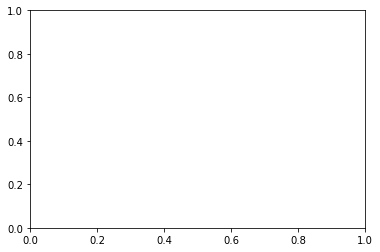

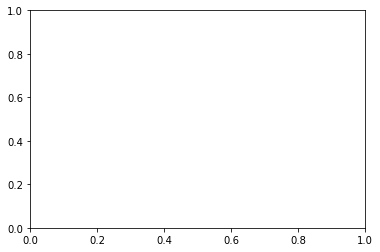

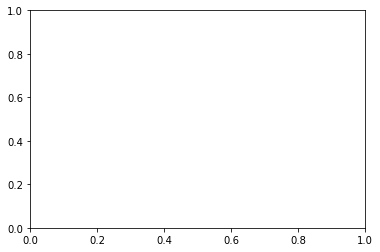

In [58]:
fig_height, ax_height = plt.subplots()
fig_diff, ax_diff = plt.subplots()
fig_dem, ax_dem = plt.subplots()

In [59]:
# %matplotlib widget

def create_coords(files):
    LON_DEGE = list()
    LAT_DEGN = list()
    WGS84ELEV_M = list()
    DEM_M  = list()
    for i_file, cmct_file in enumerate(files):
    #     print('plotting file {:4d} / {:4d}: {:s}'.format(i_file, len(cmct_files), cmct_file))
        ncfile = Dataset(cmct_file, 'r')
    
        if zoom_bounds:
            idx = (ncfile['LON_DEGE'][:] > zoom_bounds[0]) & (ncfile['LON_DEGE'][:] < zoom_bounds[1]) & \
                  (ncfile['LAT_DEGN'][:] > zoom_bounds[2]) & (ncfile['LAT_DEGN'][:] < zoom_bounds[3])
        else:
            idx = np.arange(len(ncfile['LON_DEGE'][:]))
    
        if np.sum(idx) > 0:
            LON_DEGE.extend(ncfile['LON_DEGE'][idx])
            LAT_DEGN.extend(ncfile['LAT_DEGN'][idx])
            WGS84ELEV_M.extend(ncfile['WGS84ELEV_M'][idx])
            DEM_M.extend(ncfile['DEM_M'][idx])
            #for i in np.where(idx)[0]:
            #    print('{:5.0f} {:5.0f} {:5.0f}'.format(ncfile['WGS84ELEV_M'][i], ncfile['DEM_M'][i], ncfile['WGS84ELEV_M'][i]-ncfile['DEM_M'][i]))
    
    LON_DEGE = np.array(LON_DEGE)
    LAT_DEGN = np.array(LAT_DEGN)
    WGS84ELEV_M = np.array(WGS84ELEV_M)
    DEM_M = np.array(DEM_M)
    
    ax_height = fig_height.subplots()
    ax_diff = fig_diff.subplots()
    ax_dem = fig_dem.subplots()
    sc_height = ax_height.scatter(LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M,       cmap='magma')
    sc_diff   = ax_diff.scatter(  LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M-DEM_M, cmap='coolwarm', vmin=-100, vmax=+100)
    sc_dem    = ax_dem.scatter(   LON_DEGE, LAT_DEGN, 3., c=DEM_M,             cmap='magma')
    fig_height.colorbar(sc_height)
    fig_diff.colorbar(sc_diff)
    fig_dem.colorbar(sc_dem)
    
    fig_height.draw()
    fig_diff.draw()
    fig_dem.draw()

Processing files: 0 to 5


TypeError: draw_wrapper() missing 1 required positional argument: 'renderer'

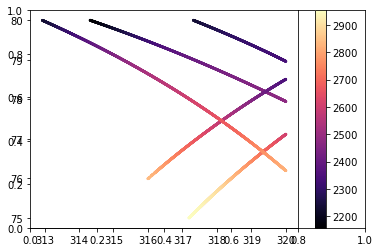

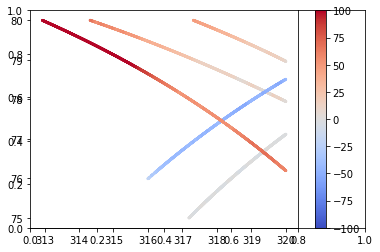

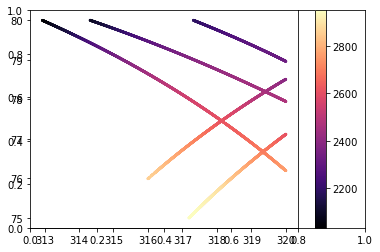

In [61]:
# %matplotlib widget

fig_height, ax_height = plt.subplots()
fig_diff, ax_diff = plt.subplots()
fig_dem, ax_dem = plt.subplots()


for i in range(1, len(cmct_files)):
#     a = input()
    lb = i*5 - 5
    ub = i*5
    
    print(f'Processing files: {lb} to {ub}')

    create_coords(cmct_files[lb:ub])
    plt.show()
    sleep(2)
    fig_height.clear()
    fig_dem.clear()
    fig_diff.clear()